In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms,datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision
import sys


import matplotlib.pyplot as plt
import time

In [2]:
import torch
import torchvision

In [3]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize = 256 # change according to system specs
BatchSize2 = 256 # change according to system specs


trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader

trainset2 = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader2 = torch.utils.data.DataLoader(trainset2, batch_size=BatchSize2,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset2 = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader2 = torch.utils.data.DataLoader(testset2, batch_size=BatchSize2,
                                         shuffle=False, num_workers=4) # Creating dataloader                                         

In [4]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))
# Size of train and test datasets
print('No. of samples in train set2: '+str(len(trainLoader2.dataset)))
print('No. of samples in test set2: '+str(len(testLoader2.dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000
No. of samples in train set2: 60000
No. of samples in test set2: 10000


In [5]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [6]:
use_gpu = torch.cuda.is_available()
net1= LeNet()
net2= LeNet()
net3= LeNet()

print(net1)
print(net2)
print(net3)

use_gpu = 0
#if use_gpu:
   # print('GPU is avaialble!')
   # net1 = net1.cuda()
   # net2 = net2.cuda()
   # net3 = net3.cuda()
    

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
LeNet(
  (conv1): Conv2d(1, 6, ker

In [7]:
criterion = nn.CrossEntropyLoss() 
learning_rate1 = 0.01
optimizer1 = optim.Adam(net1.parameters(), lr=learning_rate1) # ADAM 
num_epochs = 50

train_loss = []
train_acc = []
for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer1.zero_grad() 
        # Data feed-forward through the network
        outputs1 = net1(inputs)
        # Predicted class is the one with maximum probability
        preds1 = torch.argmax(outputs1,dim=1)
        # Finding the loss
        loss = criterion(outputs1, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds1==labels)    
        
    totalLoss1 = running_loss/(i+1)
    # Calculating gradients
    totalLoss1.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer1.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

Epoch 1/50 : Training loss: 2.3031 | Training Accuracy: 13.2583
Epoch 2/50 : Training loss: 2.2881 | Training Accuracy: 9.9300
Epoch 3/50 : Training loss: 2.2362 | Training Accuracy: 31.1583
Epoch 4/50 : Training loss: 2.0953 | Training Accuracy: 40.5633
Epoch 5/50 : Training loss: 1.8314 | Training Accuracy: 54.9550
Epoch 6/50 : Training loss: 1.7504 | Training Accuracy: 42.4850
Epoch 7/50 : Training loss: 2.0590 | Training Accuracy: 37.1450
Epoch 8/50 : Training loss: 1.3541 | Training Accuracy: 53.7017
Epoch 9/50 : Training loss: 1.4078 | Training Accuracy: 61.6583
Epoch 10/50 : Training loss: 1.3395 | Training Accuracy: 60.8450
Epoch 11/50 : Training loss: 1.1789 | Training Accuracy: 60.9300
Epoch 12/50 : Training loss: 1.0263 | Training Accuracy: 65.4517
Epoch 13/50 : Training loss: 0.8652 | Training Accuracy: 74.3917
Epoch 14/50 : Training loss: 0.7296 | Training Accuracy: 78.3550
Epoch 15/50 : Training loss: 0.6501 | Training Accuracy: 78.5000
Epoch 16/50 : Training loss: 0.5733

Text(0, 0.5, 'Training')

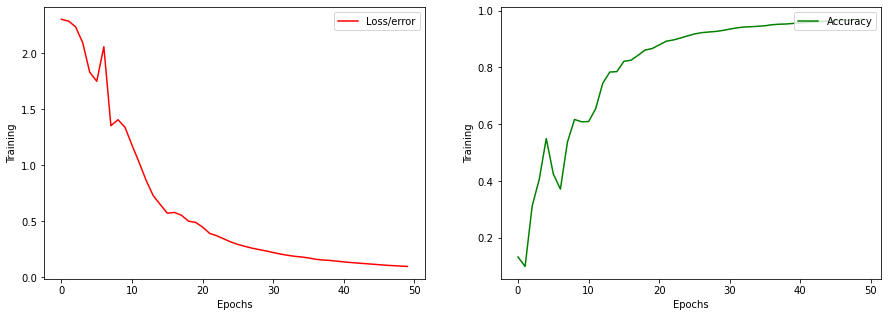

In [8]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss/error') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

In [9]:
correct_pred1=0
for data in testLoader:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net1(inputs) 
    # Predicted class is the one with maximum probability
    preds1 = torch.argmax(output,dim=1)
    correct_pred1 += torch.sum(preds1==labels)

test_accuracy = correct_pred1.item()/10000.0
print('Testing accuracy (Batch size=256, lr=0.1 = ',test_accuracy*100) #for bathch1

Testing accuracy (Batch size=256, lr=0.1 =  97.21


In [14]:
criterion = nn.CrossEntropyLoss() 
learning_rate2 = 1
optimizer2 = optim.SGD(net2.parameters(), lr=learning_rate2) # ADAM 
num_epochs2 = 50

train_loss2 = []
train_acc2 = []
for epoch in range(num_epochs2):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader2):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer2.zero_grad() 
        # Data feed-forward through the network
        outputs2 = net2(inputs)
        # Predicted class is the one with maximum probability
        preds2 = torch.argmax(outputs2,dim=1)
        # Finding the loss
        loss = criterion(outputs2, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds2==labels)    
        
    totalLoss2 = running_loss/(i+1)
    # Calculating gradients
    totalLoss2.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer2.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss2.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc2.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs2,epoch_loss,epoch_acc*100))

Epoch 1/50 : Training loss: 2.2850 | Training Accuracy: 28.4600
Epoch 2/50 : Training loss: 2.2766 | Training Accuracy: 34.9617
Epoch 3/50 : Training loss: 2.2619 | Training Accuracy: 45.7917
Epoch 4/50 : Training loss: 2.2351 | Training Accuracy: 47.1167
Epoch 5/50 : Training loss: 2.1804 | Training Accuracy: 48.8417
Epoch 6/50 : Training loss: 2.1319 | Training Accuracy: 23.7000
Epoch 7/50 : Training loss: 4.4146 | Training Accuracy: 11.0583
Epoch 8/50 : Training loss: 2.3443 | Training Accuracy: 11.2367
Epoch 9/50 : Training loss: 2.3196 | Training Accuracy: 11.2367
Epoch 10/50 : Training loss: 2.3123 | Training Accuracy: 11.2367
Epoch 11/50 : Training loss: 2.3083 | Training Accuracy: 11.2367
Epoch 12/50 : Training loss: 2.3062 | Training Accuracy: 11.2367
Epoch 13/50 : Training loss: 2.3047 | Training Accuracy: 11.2367
Epoch 14/50 : Training loss: 2.3038 | Training Accuracy: 11.2367
Epoch 15/50 : Training loss: 2.3030 | Training Accuracy: 11.2367
Epoch 16/50 : Training loss: 2.302

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_7160/2072799706.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(num_epochs2),train_loss2,'r-',color='blue',label='SGD')
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_7160/2072799706.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(range(num_epochs2),train_acc2,'g-', color='blue',label='SGD') #learning rate in both is same


Text(0, 0.5, 'Training Accuracy')

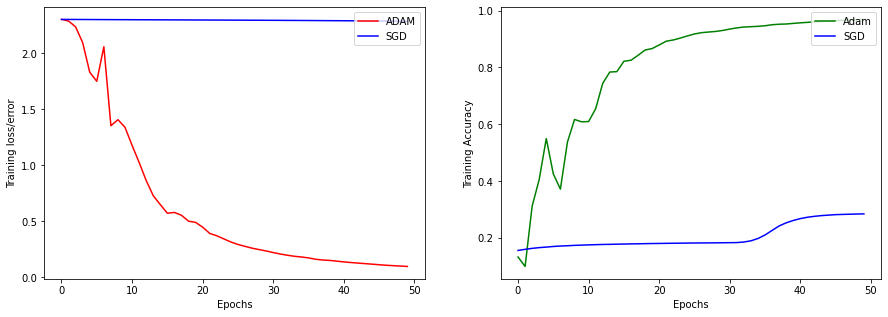

In [13]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='ADAM') 
plt.plot(range(num_epochs2),train_loss2,'r-',color='blue',label='SGD') 

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training loss/error')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Adam') 
plt.plot(range(num_epochs2),train_acc2,'g-', color='blue',label='SGD') #learning rate in both is same
 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [14]:
correct_pred2=0
for data in testLoader2:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net2(inputs) 
    # Predicted class is the one with maximum probability
    preds2 = torch.argmax(output,dim=1)
    correct_pred2 += torch.sum(preds2==labels)

test_accuracy2 = correct_pred2.item()/10000.0
print('Testing accuracy (Batch size=1024, lr=0.1) = ',test_accuracy2*100) #for bathch1

Testing accuracy (Batch size=1024, lr=0.1) =  96.73


In [15]:
criterion = nn.CrossEntropyLoss() 
learning_rate3 = 0.001
optimizer3 = optim.Adam(net3.parameters(), lr=learning_rate3) # ADAM 
num_epochs3 = 50

train_loss3 = []
train_acc3 = []
for epoch in range(num_epochs3):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer3.zero_grad() 
        # Data feed-forward through the network
        outputs3 = net3(inputs)
        # Predicted class is the one with maximum probability
        preds3 = torch.argmax(outputs3,dim=1)
        # Finding the loss
        loss = criterion(outputs3, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds3==labels)    
        
    totalLoss3 = running_loss/(i+1)
    # Calculating gradients
    totalLoss3.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer3.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss3.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc3.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs3,epoch_loss,epoch_acc*100))

Epoch 1/50 : Training loss: 2.3034 | Training Accuracy: 9.7367
Epoch 2/50 : Training loss: 2.2997 | Training Accuracy: 9.7367
Epoch 3/50 : Training loss: 2.2960 | Training Accuracy: 9.7367
Epoch 4/50 : Training loss: 2.2912 | Training Accuracy: 13.8967
Epoch 5/50 : Training loss: 2.2855 | Training Accuracy: 30.7950
Epoch 6/50 : Training loss: 2.2786 | Training Accuracy: 37.2650
Epoch 7/50 : Training loss: 2.2700 | Training Accuracy: 39.1817
Epoch 8/50 : Training loss: 2.2594 | Training Accuracy: 42.6183
Epoch 9/50 : Training loss: 2.2466 | Training Accuracy: 47.1333
Epoch 10/50 : Training loss: 2.2306 | Training Accuracy: 49.0333
Epoch 11/50 : Training loss: 2.2113 | Training Accuracy: 49.4917
Epoch 12/50 : Training loss: 2.1888 | Training Accuracy: 50.9133
Epoch 13/50 : Training loss: 2.1621 | Training Accuracy: 53.2933
Epoch 14/50 : Training loss: 2.1305 | Training Accuracy: 55.7183
Epoch 15/50 : Training loss: 2.0936 | Training Accuracy: 57.2650
Epoch 16/50 : Training loss: 2.0504 |

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10980/3260109533.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(num_epochs),train_loss3,'r-',color='blue',label='Batch size=256,lr=.001')
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10980/3260109533.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(range(num_epochs),train_acc3,'g-', color='blue',label='Batch size=256, lr=.001')


Text(0, 0.5, 'Training Accuracy')

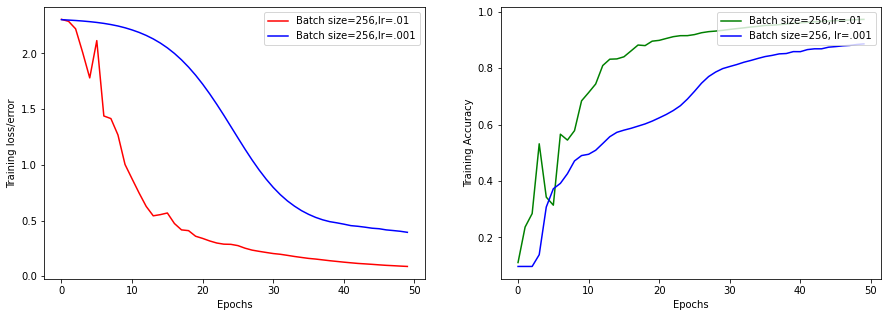

In [16]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Batch size=256,lr=.01') 
plt.plot(range(num_epochs),train_loss3,'r-',color='blue',label='Batch size=256,lr=.001') 

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training loss/error')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Batch size=256,lr=.01') 
plt.plot(range(num_epochs),train_acc3,'g-', color='blue',label='Batch size=256, lr=.001') 
 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [17]:
correct_pred3=0
for data in testLoader:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net3(inputs) 
    # Predicted class is the one with maximum probability
    preds3 = torch.argmax(output,dim=1)
    correct_pred3 += torch.sum(preds3==labels)

test_accuracy3 = correct_pred3.item()/10000.0
print('Testing accuracy (Batch size=256, lr=.01) = ',test_accuracy3*100) #for bathch1

Testing accuracy (Batch size=256, lr=.01) =  89.14999999999999


In [2]:
torch.cuda.is_available()

True